In [1]:
import numpy as np
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from astroNN.datasets import load_galaxy10

2023-05-02 17:10:48.459740: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-02 17:10:49.491643: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/spcup2022/miniconda3/envs/spcup2023/lib/
2023-05-02 17:10:49.491751: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/spcup2022/miniconda3/envs/spcup2023/lib/
2023-05-02 17:10:49.491759

In [2]:
images, labels = load_galaxy10()

/home/spcup2022/.astroNN/datasets/Galaxy10_DECals.h5 was found!


In [3]:
# define the input shape of the images
input_shape = (256, 256, 3)

# define the encoder architecture
input_img = Input(shape=input_shape)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# define the decoder architecture
x = Conv2D(4, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='relu', padding='same')(x)

# define the autoencoder model
autoencoder = Model(input_img, decoded)

autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 8)       1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 4)         292   

2023-05-02 17:11:45.801917: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-02 17:11:48.693793: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9637 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:18:00.0, compute capability: 7.5
2023-05-02 17:11:48.695318: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 9637 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:3b:00.0, compute capability: 7.5
2023-05-02 17:11:48.696344: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/repli

In [4]:
# define the SSIM loss
def ssim_loss(original, compressed):
    ssim = tf.image.ssim(original, compressed, max_val=1.0)
    return 1 - ssim

In [5]:

# # compile the model
# autoencoder.compile(optimizer='adam', loss=['mse', ssim_loss])

# # prepare the data
# x_train = images

# # train the autoencoder model
# history = autoencoder.fit(x_train, x_train,
#                 epochs=50,
#                 batch_size=128,
#                 shuffle=True)


In [6]:
path_write = '/data/spcup2022/UDAY/DSmodels/'
# autoencoder.save_weights(path_write + 'auto_encoder.h5')

autoencoder.load_weights(path_write + 'auto_encoder.h5')

In [15]:
# idx = np.random.choice(np.arange(images.shape[0]), size=500)

# reconstructed_images = np.clip(autoencoder.predict(images[idx]), 0, 255).astype(np.uint8)

16/16 [==============================] - 0s 7ms/step


In [13]:
idxs = [11170, 10609, 17689, 14521, 3994, 14633, 1938, 12871, 9254, 10513, 9871]

reconstructed_images = np.clip(autoencoder.predict(images[idxs]), 0, 255).astype(np.uint8)

1/1 [==============================] - 0s 44ms/step


In [14]:
reconstructed_images.shape

(11, 256, 256, 3)

In [15]:
import matplotlib.pyplot as plt

In [18]:
path = 'results/AE_{}.jpeg'
for i in range(len(idxs)):
#         image_reconstructed = kmeans_compress(images[i], n_clusters)
    plt.imsave(path.format(idxs[i]), reconstructed_images[i])

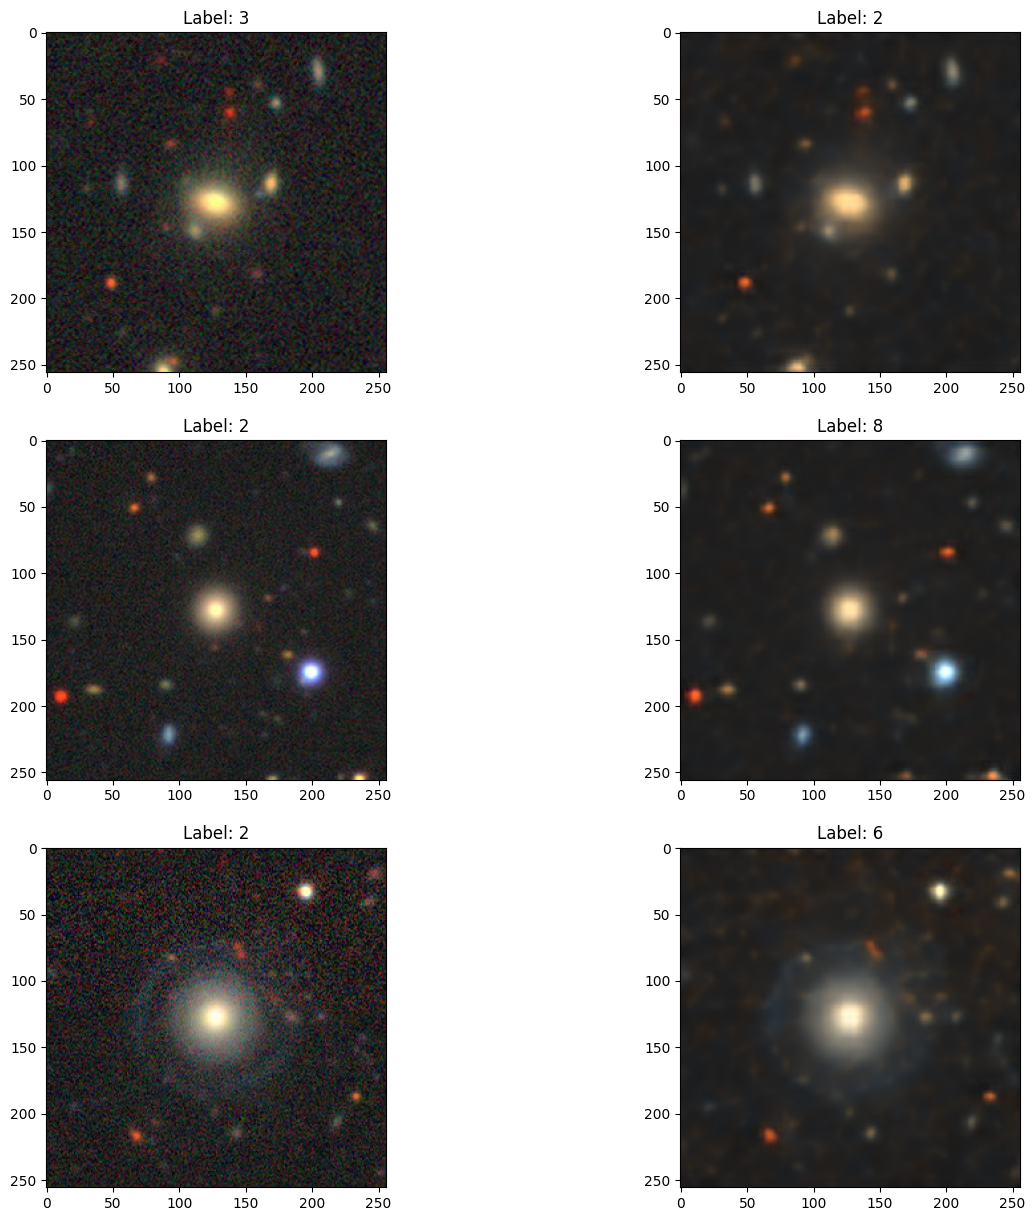

In [17]:
plt.figure(figsize=(15, 15))
for i in range(3):
    plt.subplot(3, 2, 2*i+1)
    j = idx[i]
    plt.title("Label: {}".format(labels[j]))
    plt.imshow(images[j])
    
    
    plt.subplot(3, 2, 2*i+2)
    j = np.random.randint(0, images.shape[0])
    plt.title("Label: {}".format(labels[j]))
    plt.imshow(reconstructed_images[i])

In [18]:
plt.imsave('test.jpeg', images[idx[2]])
plt.imsave('test_hat.jpeg', reconstructed_images[2])